<a href="https://colab.research.google.com/github/pastrop/kaggle/blob/master/TextSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# file upload while using Google Colab
from google.colab import files
uploaded = files.upload()

Saving beer_concept_500_8777docs.json to beer_concept_500_8777docs.json


In [ ]:
import json
with open('beer_concept_500_8777docs.json') as f:
    inp = json.load(f)

In [ ]:
concepts = []
for item in inp:
  concepts.append(item['texts'][0])

In [ ]:
#Test code - Concept Search
for item in concepts:
  if item == 'coffee':
    print('Yes')

Yes


**SBERT**

In [1]:
%pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.1 MB/s 
     |████████████████████████████████| 5.5 MB 23.2 MB/s 
     |████████████████████████████████| 1.3 MB 56.6 MB/s 
     |████████████████████████████████| 182 kB 69.6 MB/s 
     |████████████████████████████████| 7.6 MB 51.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=6797691eb62c1a1482ee0bb052fff9e5342e2749f34797fd89c3dae0f6ff7d58
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer, util

In [ ]:
%%capture
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [ ]:
"2009 12oz. bottle served into a Gulden Draak tulip Pours burnt orange/copper with a one-finger sized porcelain-white head. The beer laces well, with sudsy patterns. Attractive and well-executed. The nose opens with a grenade blast of hops. Devil Dancer doesn't really smell floral like many heavily hopped beers do. The hop bouquet is more resiny and oily. This beer smells bitter, if that makes any sense. Its almost as if I'm experiencing the strength of a normal IPA's hop flavors on the tongue... only I'm experiencing that level of strength purely through my nose. This beer was also less boozy than I expected, but the alcohol is present nonetheless. The word doesn't do Devil Dancer justice. Not quite. This beer is sublimely hoppy. Mango and pineapple are strong initially" 

In [ ]:
target = 'coffee'
emb_target = model.encode(target)

In [ ]:
emb_target

In [ ]:
emb_corpus = model.encode(concepts)
cosine_scores = util.cos_sim(emb_target, emb_corpus)
arr = cosine_scores.numpy().flatten().tolist()

In [ ]:
emb_corpus.shape

(500, 384)

In [ ]:
arr = cosine_scores.numpy().flatten().tolist()
simularity = list(zip(arr,concepts))
sorted(simularity, reverse = True)[:20]

[(1.0, 'coffee'),
 (0.8155989646911621, 'roasted coffee'),
 (0.764582633972168, 'chocolate and coffee'),
 (0.5764206051826477, 'drink'),
 (0.5076597332954407, 'brew'),
 (0.5041046142578125, 'cocoa'),
 (0.5009302496910095, 'sip'),
 (0.4966921806335449, 'juice'),
 (0.4879511296749115, 'espresso'),
 (0.4644039273262024, 'drinkable'),
 (0.4570234715938568, 'session beer'),
 (0.4553448557853699, 'brewpub'),
 (0.4476625919342041, 'cream'),
 (0.4450848400592804, 'refreshing'),
 (0.437473326921463, 'easy to drink'),
 (0.4294916093349457, 'vanilla'),
 (0.421149343252182, 'sipper'),
 (0.4197905659675598, 'dark chocolate'),
 (0.4186149835586548, 'Drinkability'),
 (0.414207398891449, 'buttery')]

In [ ]:
arr = cosine_scores.numpy().flatten().tolist()
len(arr)

500

# PCA Experiments

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [ ]:
# visualization code - PCA
def PCA_plot(emb):
  pca = PCA(n_components=2)
  #Creates and PCA model and plots it
  principal_comp = pca.fit_transform(emb)

  x = []
  y = []
  for value in principal_comp:
    x.append(value[0])
    y.append(value[1])

In [ ]:
  plt.figure(figsize=(16, 16)) 
  #Outputting all the embeddings
  for i in range(len(x)):
    plt.scatter(x[i],y[i])
  plt.show()

In [ ]:
#PCA
pca = PCA(n_components=2)

In [ ]:
#PCA
principal_comp = pca.fit_transform(emb_corpus)

NameError: ignored

In [ ]:
concepts_PCA_dict = {}
for ind, item in enumerate(concepts):
  concepts_PCA_dict[item] = principal_comp[ind]

NameError: ignored

In [ ]:
cosine_scores_PCA = util.cos_sim(concepts_PCA_dict['coffee'], principal_comp)
simm_PCA = cosine_scores_PCA.numpy().flatten().tolist()

In [ ]:
simularity = list(zip(simm_PCA,concepts))
sorted(simularity, reverse = True)[:20]

[(1.0000001192092896, 'coffee'),
 (0.9999927282333374, 'mouth'),
 (0.9999885559082031, 'licorice'),
 (0.9997669458389282, 'brown ale'),
 (0.9997032284736633, 'barleywine'),
 (0.9996111392974854, 'bitter'),
 (0.999382734298706, 'toasted malt'),
 (0.998779296875, 'nice lacing'),
 (0.9975904822349548, 'bite'),
 (0.997313380241394, 'lacing on the glass'),
 (0.9953543543815613, 'blend'),
 (0.9925642013549805, 'wine'),
 (0.9917826056480408, 'sticky lacing'),
 (0.9883390069007874, 'toasted'),
 (0.9883090257644653, 'resin'),
 (0.9881381988525391, 'medicinal'),
 (0.988008975982666, 'charred'),
 (0.9877126216888428, 'Belgian yeast'),
 (0.9873654842376709, 'mouthfeel'),
 (0.987271785736084, 'boozy')]

**Using Lumi Embeddings**

In [ ]:
emb_lumi = []
for item in inp:
  emb_lumi.append(item['vect_unpacked'])

In [ ]:
emb_lumi_np = np.array(emb_lumi)

In [ ]:
principal_comp_lumi = pca.fit_transform(emb_lumi)

In [ ]:
concepts_PCA_dict_lumi = {}
for ind, item in enumerate(concepts):
  concepts_PCA_dict_lumi[item] = principal_comp_lumi[ind]

In [ ]:
cosine_scores_PCA_lumi = util.cos_sim(concepts_PCA_dict_lumi['coffee'], principal_comp_lumi)
simm_PCA_lumi = cosine_scores_PCA_lumi.numpy().flatten().tolist()

In [ ]:
cosine_coffee_flavor = util.cos_sim(concepts_PCA_dict_lumi['flavor'], concepts_PCA_dict_lumi['taste'])

In [ ]:
cosine_coffee_flavor

tensor([[0.9652]], dtype=torch.float64)

In [ ]:
simularity_lumi = list(zip(simm_PCA_lumi,concepts))
sorted(simularity_lumi, reverse = True)[:100]

[(1.0, 'coffee'),
 (0.9999999735019952, 'sweet caramel'),
 (0.9999986180673385, 'molasses'),
 (0.9999983630024668, 'toffee'),
 (0.9999895939722754, 'juice'),
 (0.9999893426717319, 'raisins'),
 (0.9999726020504714, 'toasted'),
 (0.9999197298688025, 'skunky'),
 (0.999764850430487, 'pine'),
 (0.9997203223434928, 'watery'),
 (0.9994789928346032, 'floral'),
 (0.999439472863176, 'lemon'),
 (0.9992786755260546, 'ripe'),
 (0.9990144230955154, 'rind'),
 (0.9989942644308821, 'brown sugar'),
 (0.9989744923354216, 'charred'),
 (0.9985956816196454, 'smoky'),
 (0.9984359233790073, 'candy'),
 (0.9983895132245233, 'grass'),
 (0.9982901086876159, 'cinnamon'),
 (0.9982191526422795, 'pear'),
 (0.9980217153340366, 'resin'),
 (0.9978706435460704, 'grape'),
 (0.9978599932336913, 'grainy'),
 (0.9977404400121644, 'soft'),
 (0.9975225730156455, 'roasted coffee'),
 (0.9972853839109034, 'caramel'),
 (0.9965410483910768, 'honey'),
 (0.9961946087854918, 'mango'),
 (0.9958798263900134, 'nuts'),
 (0.9958136865064282

**UMAP Projection & KNN Clustering**

In [ ]:
!pip install umap-learn

In [ ]:
import umap

In [ ]:
def umap_reducer(neighbors, emb):
  reducer = umap.UMAP(n_neighbors=10) 
  return reducer.fit_transform(emb)

In [ ]:
emb_umap = umap_reducer(10, emb_lumi_np)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Pick the number of clusters
n_clusters=8

# Cluster the embeddings
kmeans_model = KMeans(n_clusters=n_clusters, random_state=0)
classes = kmeans_model.fit_predict(principal_comp_lumi)

In [ ]:
len(classes)

500

In [ ]:
labels = classes.tolist()
clusters = ['smell','pours','carbonation','aroma','brewery','lacing','flavor','brew']

In [ ]:
# PCA Cluster labels
df_PCA = pd.DataFrame({'CONCEPT': concepts, 'LABEL': labels})

In [ ]:
df_PCA.loc[df_PCA['LABEL'] == 7]

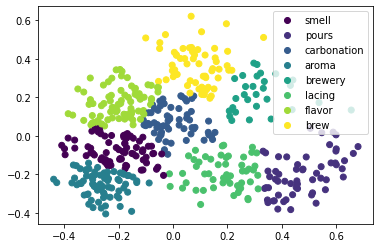

In [ ]:
#Scatter plot PCA
#plt.figure(figsize=(16, 16)) 
scatter = plt.scatter(x=principal_comp_lumi[:,0],
            y=principal_comp_lumi[:,1],
            c=labels)
plt.legend(handles=scatter.legend_elements()[0],labels=clusters)

In [ ]:
# Pick the number of clusters
n_clusters=8

# Cluster the embeddings UMAP
kmeans_model = KMeans(n_clusters=n_clusters, random_state=0)
classes_UMAP = kmeans_model.fit_predict(emb_umap)

In [ ]:
labels_UMAP = classes_UMAP.tolist()

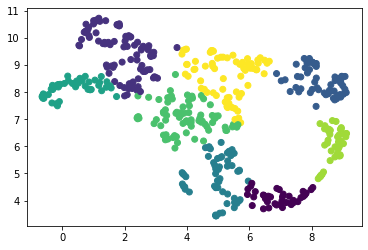

In [ ]:
#Scatter Plot UMAP
plt.scatter(x=emb_umap[:,0],
            y=emb_umap[:,1],
            c=labels_UMAP)

In [ ]:
# Cluster labels
df_umap = pd.DataFrame({'CONCEPT': concepts, 'LABEL': labels_UMAP})

In [ ]:
df_umap.loc[df_umap['LABEL'] == 2]

# Sentiment Analysis - SieBert

In [5]:
# file upload while using Google Colab
from google.colab import files
uploaded = files.upload()

Saving beer_5k.csv to beer_5k.csv


In [ ]:
import pandas as pd

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv("beer_5k.csv")
df.head()

In [ ]:
texts = []

In [ ]:
df['text'][1].replace("\t", " ")

'Dark red color, light beige foam, average. In the smell malt and caramel, not really light. Again malt and caramel in the taste, not bad in the end. Maybe a note of honey in teh back, and a light fruitiness. Average body. In the aftertaste a light bitterness, with the malt and red fruit. Nothing exceptional, but not bad, drinkable beer.'

In [ ]:
for i in range(100):
  texts.append(df['text'][i].replace("\t", " "))

In [ ]:
concepts = ['aroma','smell','beer']

In [ ]:
def doc_to_sent(doc):
  tokens = nltk.sent_tokenize(doc)
  return tokens

In [ ]:
concepts_dict = {}
for concept in concepts:
  concepts_dict[concept] = []

In [ ]:
for k, doc in enumerate(texts[:10]):
  sentences = doc_to_sent(doc)
  for concept in concepts:
    for i, sentence in enumerate(sentences):
      if (sentence.find(concept) != -1):
        concepts_dict[concept].append((k,i))      

In [ ]:
concepts_dict

{'aroma': [(4, 4), (6, 2), (7, 3)],
 'smell': [(0, 2), (1, 1), (2, 2), (3, 3)],
 'beer': [(1, 6),
  (4, 3),
  (4, 7),
  (4, 9),
  (4, 10),
  (4, 11),
  (5, 10),
  (6, 1),
  (7, 2),
  (7, 7),
  (7, 10),
  (8, 1),
  (9, 8)]}

In [2]:
%%capture
!pip install transformers

In [ ]:
from transformers import pipeline
sentiment_analysis = pipeline("text-classification", model="j-hartmann/sentiment-roberta-large-english-3-classes", return_all_scores=True)
#print(sentiment_analysis("Smokey and spicy summer sausage is all I can smell no matter how I try."))

In [20]:
print(sentiment_analysis("This band aids worked great overall. I loved the XL size, which worked well for our current needs. The removing of band aids is always painful for the whole family. This process was much less painful. I would definitely repurchase this product to have on hand."))

[[{'label': 'negative', 'score': 0.00033986219204962254}, {'label': 'neutral', 'score': 0.0003540195757523179}, {'label': 'positive', 'score': 0.9993060827255249}]]


In [7]:
print(sentiment_analysis("It may be good or may be bad")[0])

[{'label': 'negative', 'score': 0.03651849925518036}, {'label': 'neutral', 'score': 0.9624488353729248}, {'label': 'positive', 'score': 0.0010325562907382846}]


In [8]:
print(sentiment_analysis("It may be bad or may be very good")[0])

[{'label': 'negative', 'score': 0.9843611717224121}, {'label': 'neutral', 'score': 0.014101230539381504}, {'label': 'positive', 'score': 0.0015376234659925103}]


In [ ]:
print(sentiment_analysis("It may be either bad or good"))

[[{'label': 'negative', 'score': 0.5826348662376404}, {'label': 'neutral', 'score': 0.4156332015991211}, {'label': 'positive', 'score': 0.0017319732578471303}]]


In [ ]:
sentiment_analysis_siebert = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")

In [10]:
print(sentiment_analysis_siebert("It may be good or may be bad")[0])
print(sentiment_analysis_siebert("It may be bad or may be good")[0])

{'label': 'NEGATIVE', 'score': 0.9592878818511963}
{'label': 'POSITIVE', 'score': 0.9914030432701111}


In [ ]:
concepts = ['bacon','aroma']

In [ ]:
tokens = nltk.sent_tokenize(texts[50])
for t in tokens:
  print (t, "\n")

Deep cherry body with a faint beige head the recedes to nothing. 

No cap, no wisp ring, no lacing. 

Can't say this looks like anything special. 

Smokey and spicy summer sausage is all I can smell no matter how I try. 

It is however a wonderful aroma that I really enjoy. 

Wow! 

We have liquid bacon in a glass here! 

Although initially the cured meat taste is so intense I can't look past it, I was finally able to pick on its other dynamics half way through the bomber. 

Sweet stone fruits and a touch of orange zest add their nuances to the flavor. 

Its more complex than I usually find smoked beers to be and I can really enjoy it! 

Semi-thin in body with fine prickly carbonation is a nice contrast to such a powerful flavor profile. 

Anything heavier may have been too much. 

Finishes clean. 

I found this a little difficult to drink at first due to its uniqueness, but grew accustomed to the pungency. 

This is a nice sipper if given a chance and I'm really glad I tried it. 

Rec

In [ ]:
concept_loc = []
sentences = nltk.sent_tokenize(texts[50])
for i, sentence in enumerate(sentences):
  for concept in concepts:
    if (sentence.find(concept) != -1):
      print(sentence.find(concept))
      concept_loc.append((i,concept))

26
15


In [ ]:
concept_loc

[(4, 'aroma'), (6, 'bacon')]

# Sentiment Analysis investigation 

In [2]:
from transformers import pipeline

In [9]:
%%capture
sentiment_analysis = pipeline("text-classification", model="j-hartmann/sentiment-roberta-large-english-3-classes", return_all_scores=True, device=0)

Some weights of the model checkpoint at j-hartmann/sentiment-roberta-large-english-3-classes were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
import time
import pandas as pd

In [6]:
df = pd.read_csv("beer_5k.csv")
#df.head()

In [7]:
texts = [item.replace("\t", " ")[:1000] for item in df['text'] [:3000]]

In [50]:
texts[484]

'Always interested in a can.  Appearance - A deep copper/amber color. Very clear. Half inch of white soapy head. Laces well.   Smell - Some grapefruit hops, with a touch of pine. Also a little sweet malt. The hops are a little subdued.   Taste - Follows the smell. There is some nice hops up front, but the malt really comes through at the end. There is a real sweetness, and a little burnt maltiness on the finish.   Mouthfeel - A little on the thin side. Nice carbonation.   Drinkability - Pretty decent, it\'s a nice beer, but nothing special.   This is a maltier "east coast" style ipa. It\'s a pretty good beer, but not necessarily my favorite.'

In [51]:
sentiment_analysis(texts[485])

[[{'label': 'NEGATIVE', 'score': 0.0015217895852401853},
  {'label': 'POSITIVE', 'score': 0.9984782338142395}]]

In [53]:
#bcs data is dirty
texts_alt = []
for i in range(4999):
  if type(df['text'][i]) == str:
    texts_alt.append(df['text'][i].replace("\t", " "))

In [ ]:
texts_alt[10]

In [67]:
#test code to check counting
e = []
for item in texts_alt:
  if item.find(" thin ") != -1:
    e.append(item)

In [68]:
len(e)

667

In [10]:
sentiments = []
start_time = time.time()
for item in texts:
  tmp = (item, sentiment_analysis(item)[0])
  sentiments.append(tmp)
print("--- %s seconds ---" % (time.time() - start_time))  

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/base.py:1046: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,


--- 109.70648455619812 seconds ---


In [21]:
ex[5][1]

[{'label': 'negative', 'score': 0.00028445824864320457},
 {'label': 'neutral', 'score': 0.003205050015822053},
 {'label': 'positive', 'score': 0.9965104460716248}]

In [43]:
ex = []
for item in sentiments:
  if item[0].find(" thin ") != -1:
    ex.append(item)

In [ ]:
len(ex)

In [45]:
pos = 0
neg = 0
neut = 0
pos_reviews =  []
def util(e):
  return e['score']

for item in ex:
  item[1].sort(key=util)
  if item[1][2]['label'] == 'negative':
    neg+=1
  if item[1][2]['label'] == 'positive':
    pos+=1
    pos_reviews.append(item)
  if item[1][2]['label'] == 'neutral':
    neut+=1

In [46]:
print(f"postive = {pos} - negative = {neg} - neutral = {neut}")

postive = 139 - negative = 102 - neutral = 129


In [51]:
len(pos_reviews[50][0].split(' '))

128

# Useful code snippets

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
type(digits.data)

In [ ]:
import json
with open('beer_concept_500.json', 'w', encoding='utf-8') as f:
    json.dump(res_['result'], f, ensure_ascii=False, indent=4)

In [ ]:
from scipy.spatial import distance

distance.cosine(item,target)

In [ ]:
pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

# Two lists of sentences
sentences1 = ['The cat sits outside',
             'A man is playing guitar',
             'The new movie is awesome']

sentences2 = ['The dog plays in the garden',
              'A woman watches TV',
              'The new movie is so great']

#Compute embedding for both lists
embeddings1 = model.encode(sentences1, convert_to_tensor=True)
embeddings2 = model.encode(sentences2, convert_to_tensor=True)

#Compute cosine-similarits
cosine_scores = util.cos_sim(embeddings1, embeddings2)

#Output the pairs with their score
for i in range(len(sentences1)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences1[i], sentences2[i], cosine_scores[i][i]))

In [ ]:
# importing the module
import pandas as pd

In [ ]:
#dataframe to TSV
  
# creating some sample data
sample = {'text': concepts,
         'embedding': emb_corpus.tolist()}

In [ ]:
# creating the DataFrame
df = pd.DataFrame(sample)
  
# displaying the DataFrame
df.head()

In [ ]:
df.to_csv('beer_500.tsv', sep="\t")

In [ ]:
import csv

In [ ]:
with open('output.tsv', 'w', newline='') as f_output:
    tsv_output = csv.writer(f_output, delimiter='\t')
    for item in emb_corpus.tolist():
      tsv_output.writerow(item)

In [ ]:
with open('meta.tsv', 'w') as f_output:
    for item in concepts:
      f_output.write("{}\n".format(item))

In [ ]:
texts = []
for i in range(4999):
  texts.append(df['text'][i].replace("\t", " "))